<a href="https://colab.research.google.com/github/eliekawasfr/Prediction-of-Product-Sales/blob/main/Elie's_Prediction_of_Product_Sales_Graphed%20_22%20Feb%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # **Project Title: (Prediction of Product Sales).**
- **Author**: *Elie Kawas*



> ## Project Overview


> ## Load and Inspect Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

fname ="/content/drive/MyDrive/Colab Notebooks/github project/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

> ## Clean Data


In [ ]:
col_types=df.dtypes
col_types
#all types are correct

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
duplicated_rows = df.duplicated(keep=False)
duplicated_rows.sum()

0

In [ ]:
df.nunique() / len(df) * 100


Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [ ]:
duplicated_id = df.duplicated(subset=['Item_Identifier'], keep=False)
duplicated_id.sum()
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
null_values=df.isna()
null_values.value_counts()
null_sums = df.isna().sum()
null_sums
null_percent = null_sums/len(df) * 100
null_percent
#weight and size

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols
num_cols = df.select_dtypes('number').columns
num_cols
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
df[num_cols].describe()

df['Item_Weight'].describe()
df['Item_Weight'].info()
df['Item_Weight']

df['Outlet_Establishment_Year'].describe()
#df['Outlet_Establishment_Year'].info()
#df['Outlet_Establishment_Year']

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
7060 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(-1)
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols
num_cols = df.select_dtypes('number').columns
num_cols

df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


> ## Exploratory Data Analysis



### which outlet type made the highest income

In [163]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()

Outlet_Type
Grocery Store         339.828500
Supermarket Type2    1995.498739
Supermarket Type1    2316.181148
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

### Which outlet type made the most income

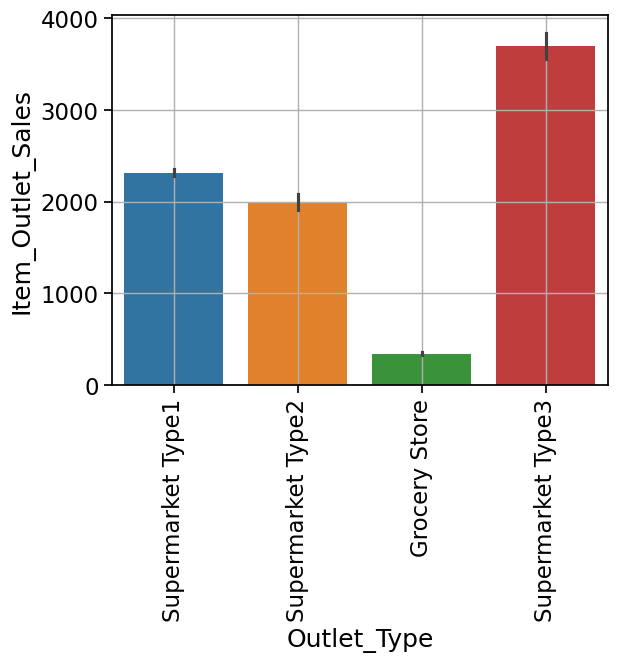

In [ ]:
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue = 'Outlet_Type')
plt.xticks(rotation=90)
ax.grid()

- type 3 has created the most income

<ipython-input-179-eee4192f7cec>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


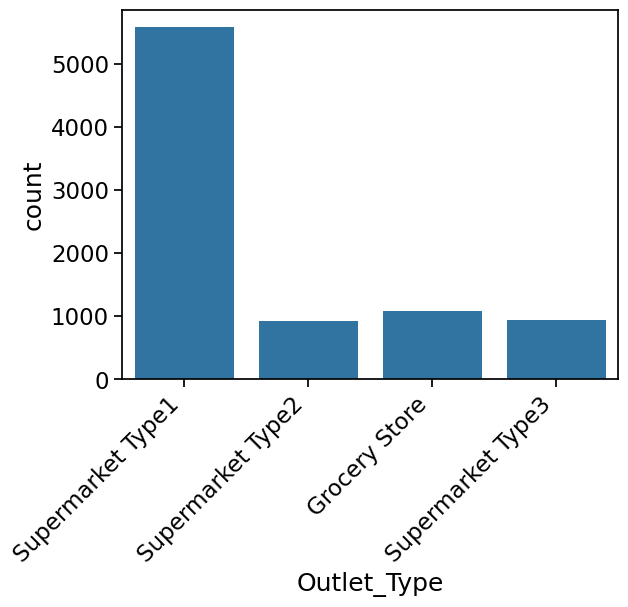

In [179]:
ax = sns.countplot(data=df, x="Outlet_Type")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');



- type 1 has created the higher number of transactions

### Item type sale Count & Item Sales income plots

In [ ]:
ivalues = df['Item_Type'].value_counts()
ivalues


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

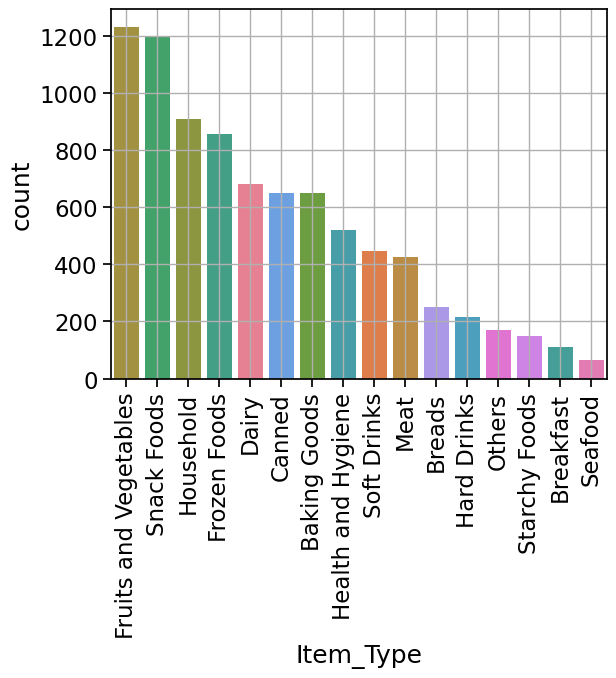

In [181]:
ax = sns.countplot(data=df, x='Item_Type', hue = 'Item_Type', order = ivalues.index )
plt.xticks(rotation=90)
ax.grid()

-  most of outlets sales were Fruits & Vegetables and Snack Foods


In [ ]:
Gtypesales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
Gtypesales

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

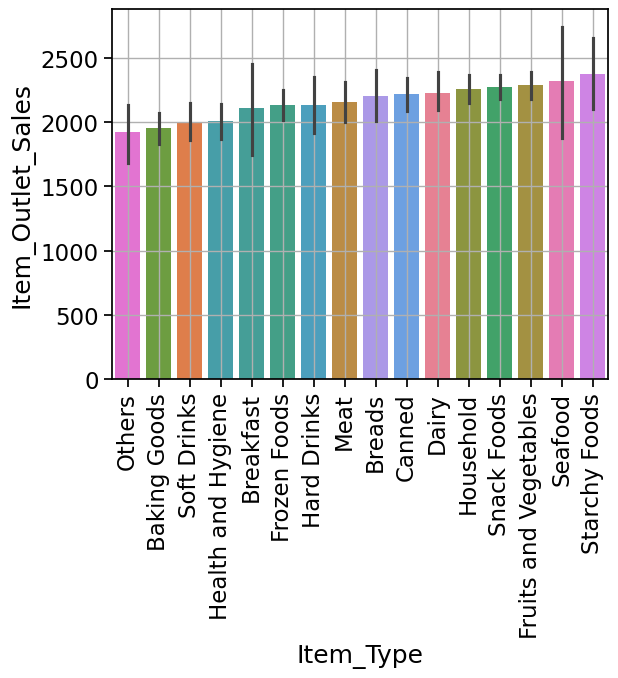

In [ ]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue = 'Item_Type', order = Gtypesales.index)
plt.xticks(rotation=90)
ax.grid()


-  higher value of transaction were starchy foods and seafood (made a higher income through less transactions in this situation than vegetables and fruits)

###  several histograms each represnting the number of occurance in a transaction, and focusing on which is the most outlet type we have sold through, and what are the most done item transaction based on its sale price


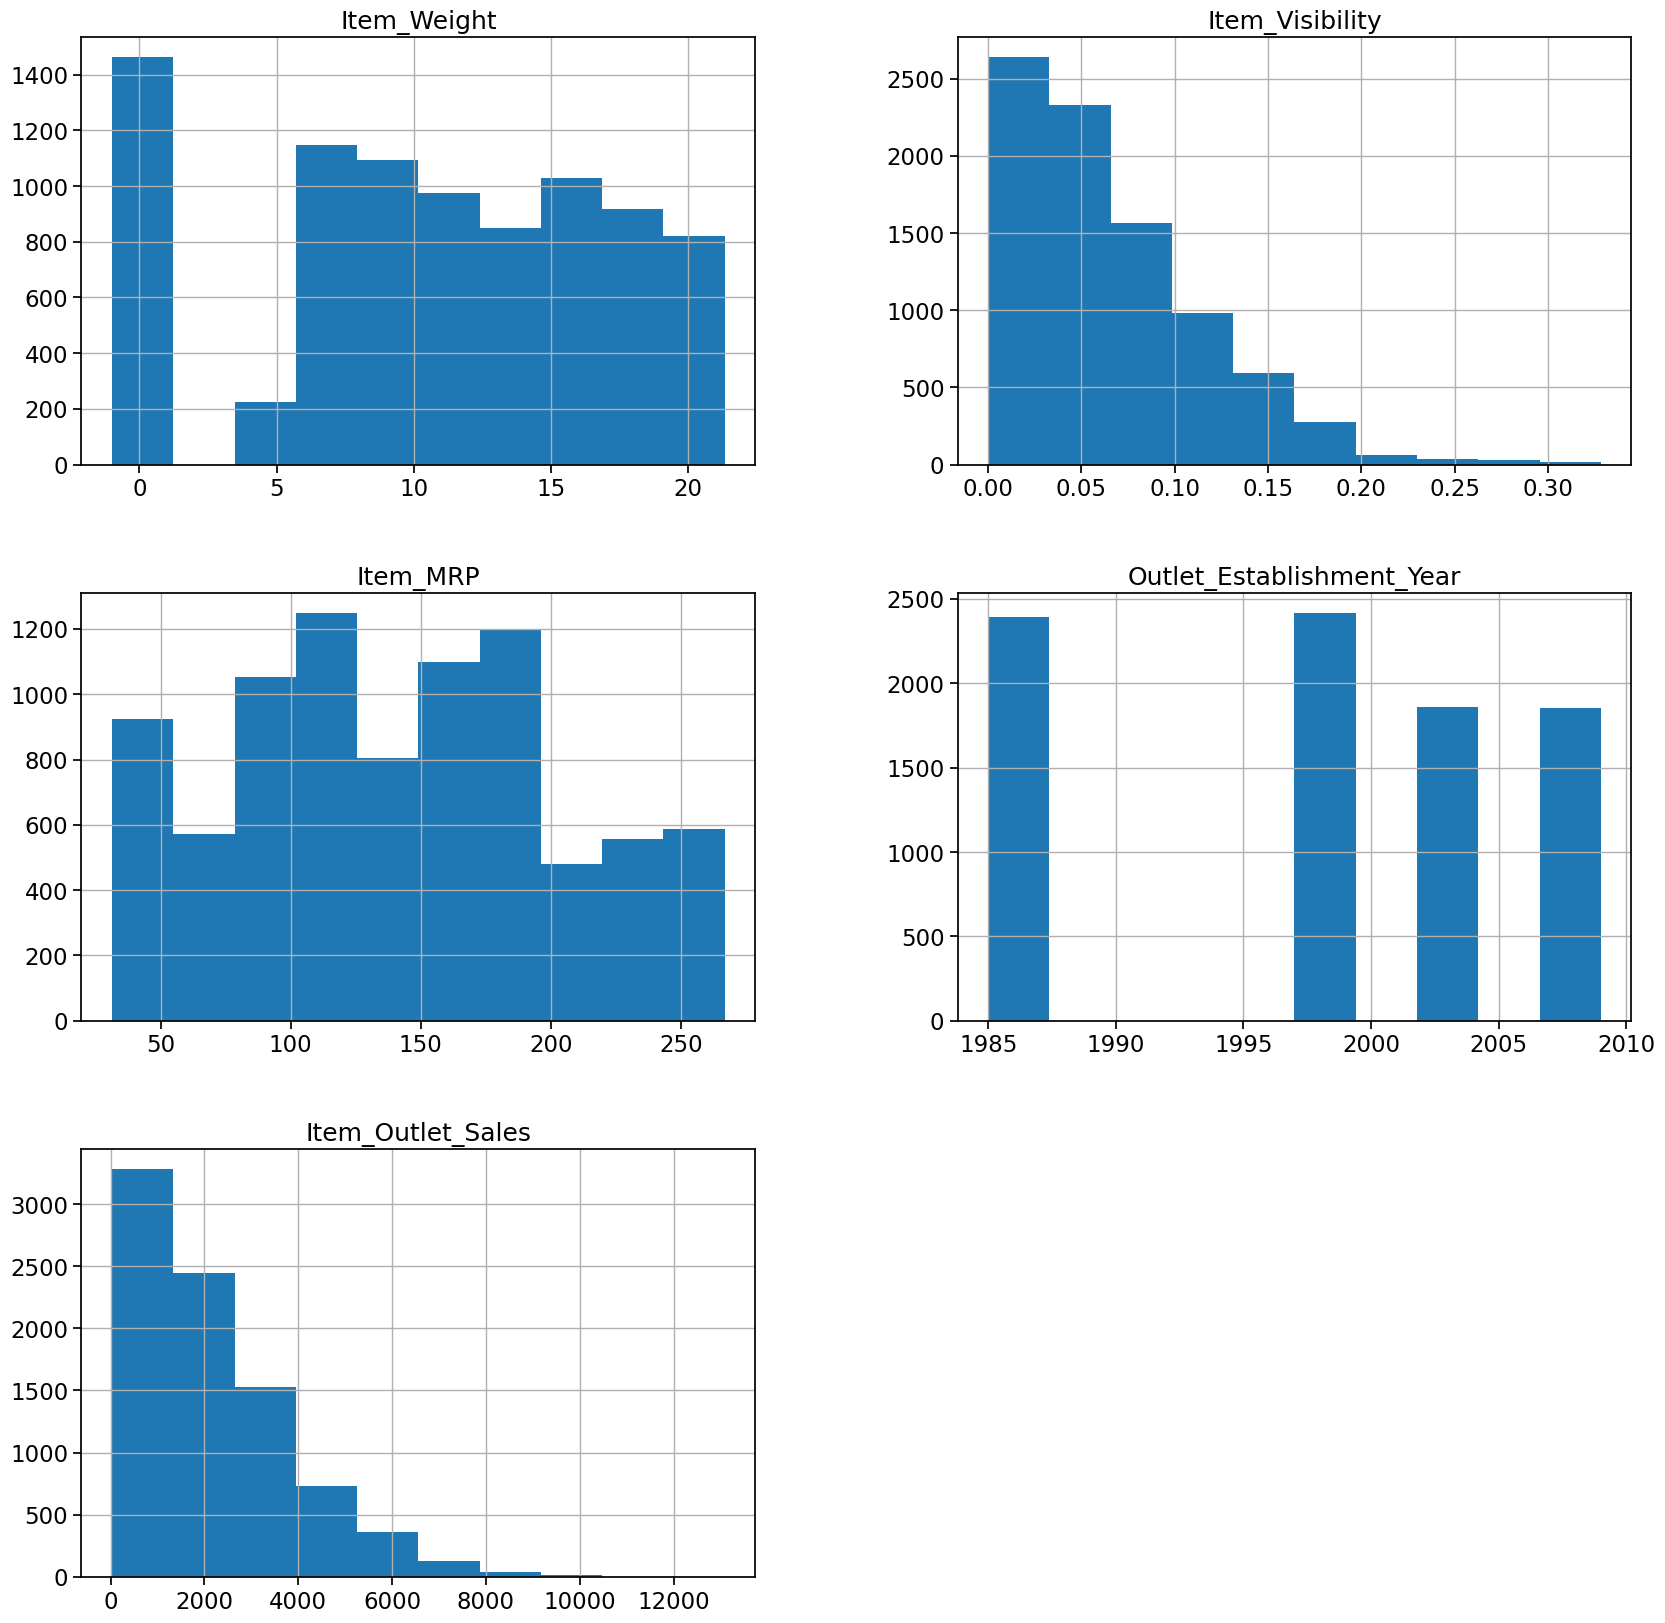

In [ ]:
df.hist(figsize=(20,20));

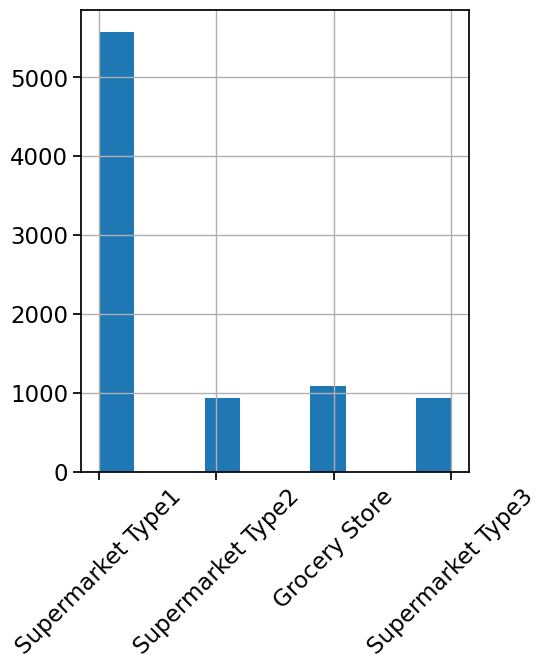

In [ ]:
df['Outlet_Type'].hist(figsize=(5,6))
plt.xticks(rotation=45);

- we have made the most sale counts(transactions) through supermarket type 1

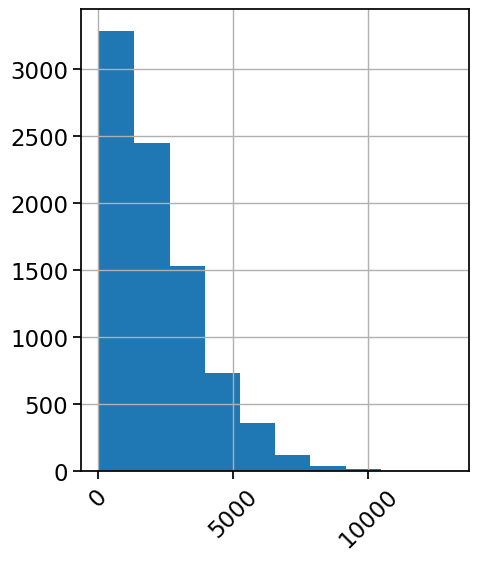

In [168]:
df['Item_Outlet_Sales'].hist(figsize=(5,6))
plt.xticks(rotation=45);

- we have sole less of the higher value transactions

### Boxplots exploring outliers, medians & Interquartile range, focusing on item sales


<Axes: >

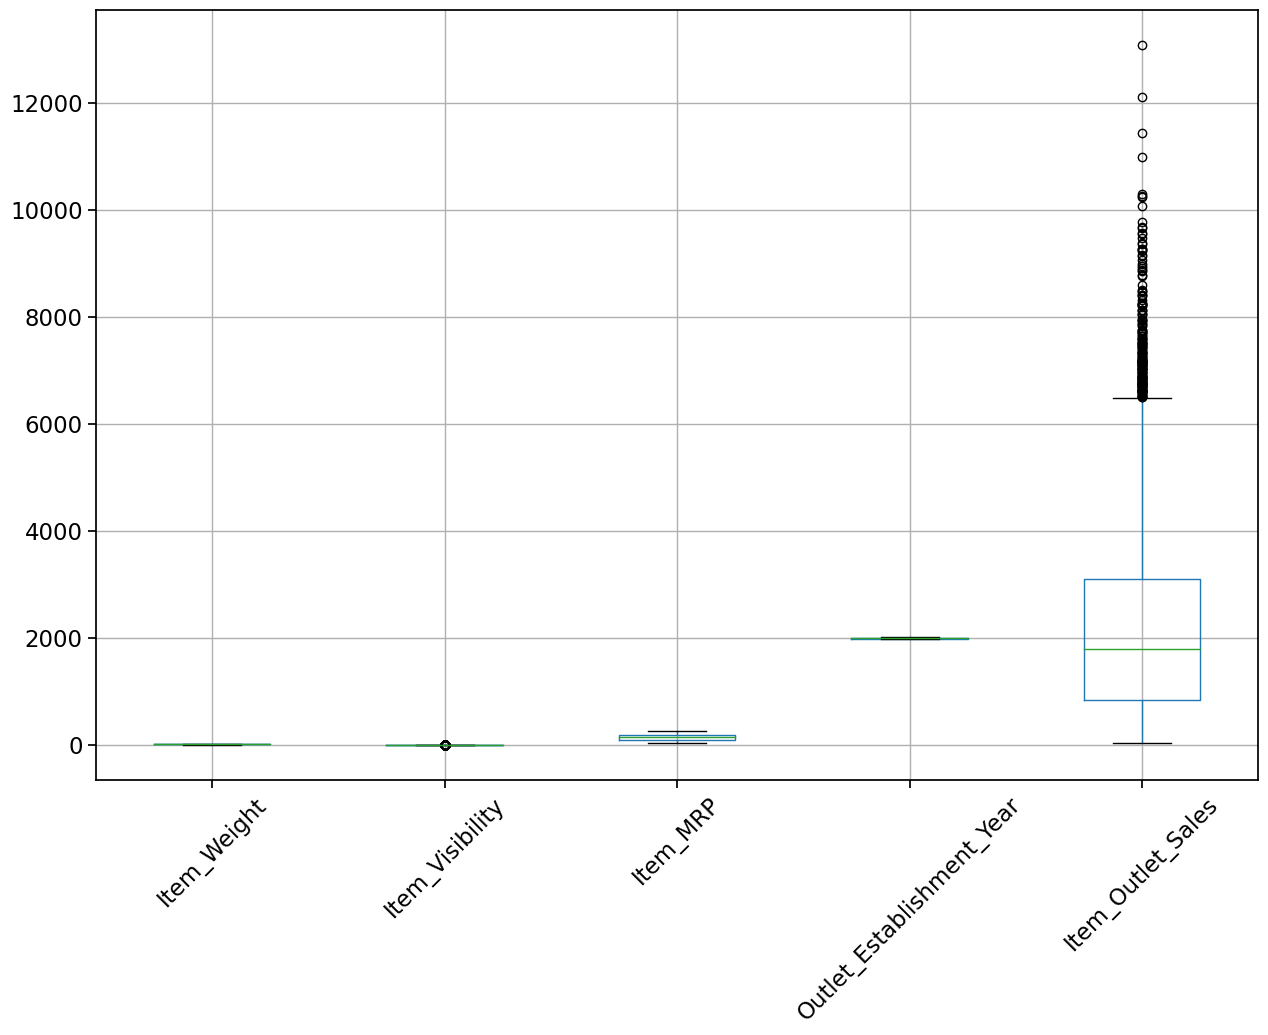

In [ ]:
ax = df.boxplot(figsize=(15,10), rot=45 )
ax


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


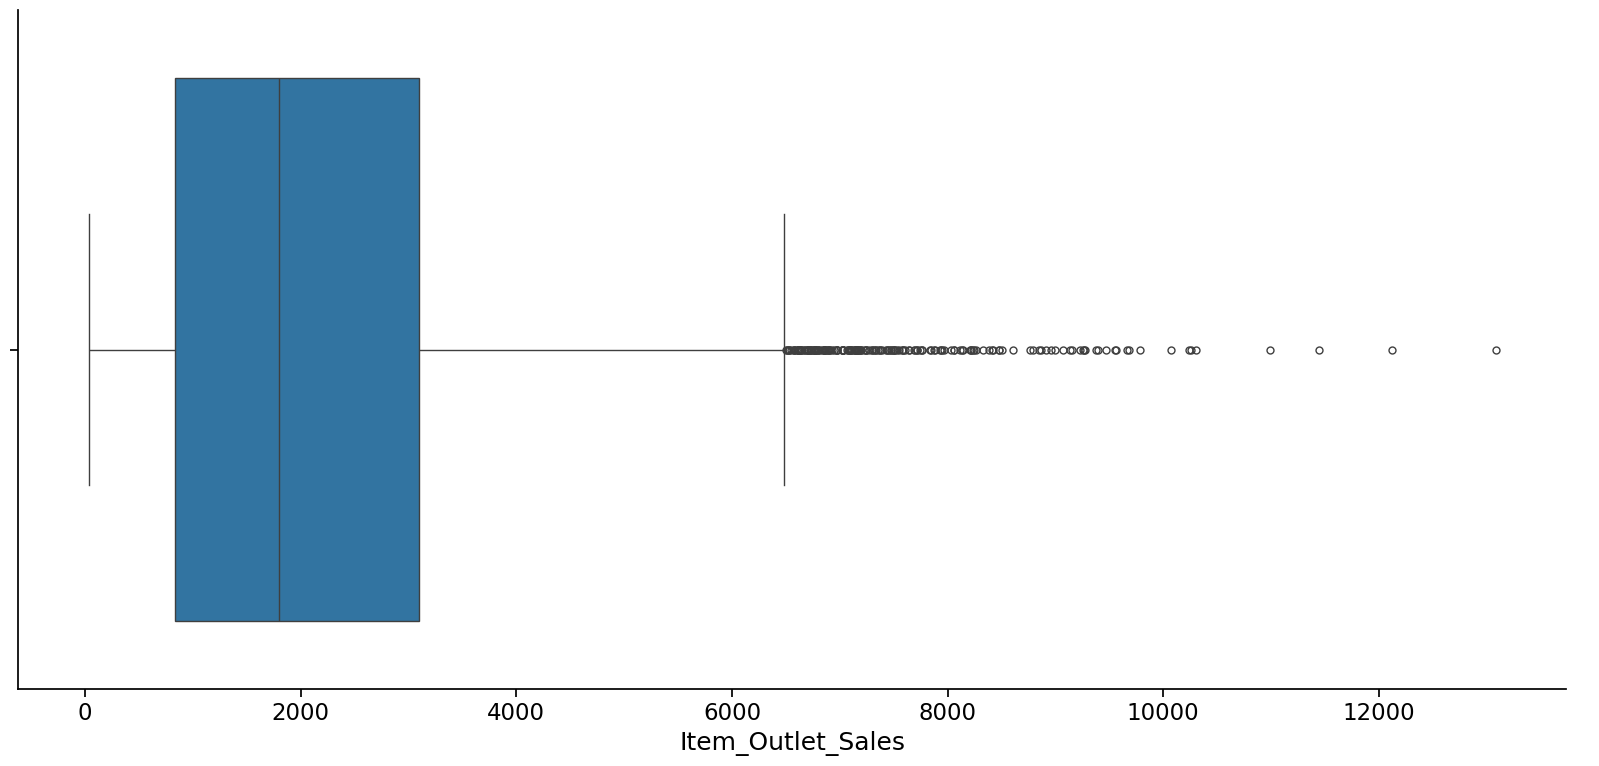

In [ ]:
g = sns.catplot(data=df , x = 'Item_Outlet_Sales' , kind='box', dodge=False, height=8, aspect=2)
print(df['Item_Outlet_Sales'].describe())


- we can see in this boxplot that most items sold are closer to 2000$, but some outliers exist in the range of more than 6501.8699 USD

### Exploring some countplots

<ipython-input-176-5f08d1433f1d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


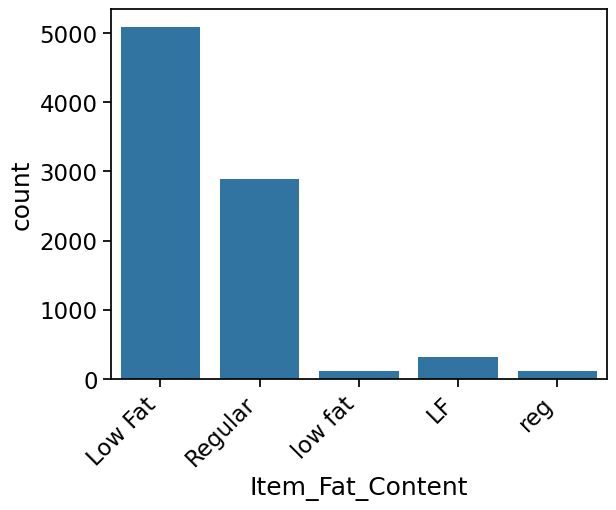

In [176]:
ax = sns.countplot(data=df, x="Item_Fat_Content")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- here we explore that more sales have been processed for the low fat category

<ipython-input-178-4f703bbca6aa>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


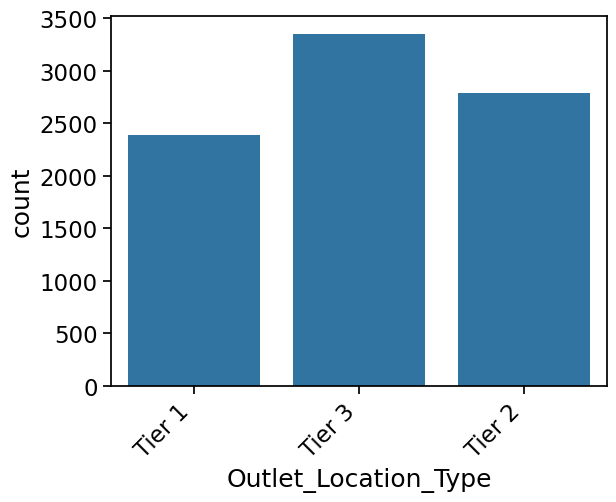

In [178]:
ax = sns.countplot(data=df, x="Outlet_Location_Type") ############################################################

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');



### Correlation of the numerical variables in the DF to explore the relationship between variables


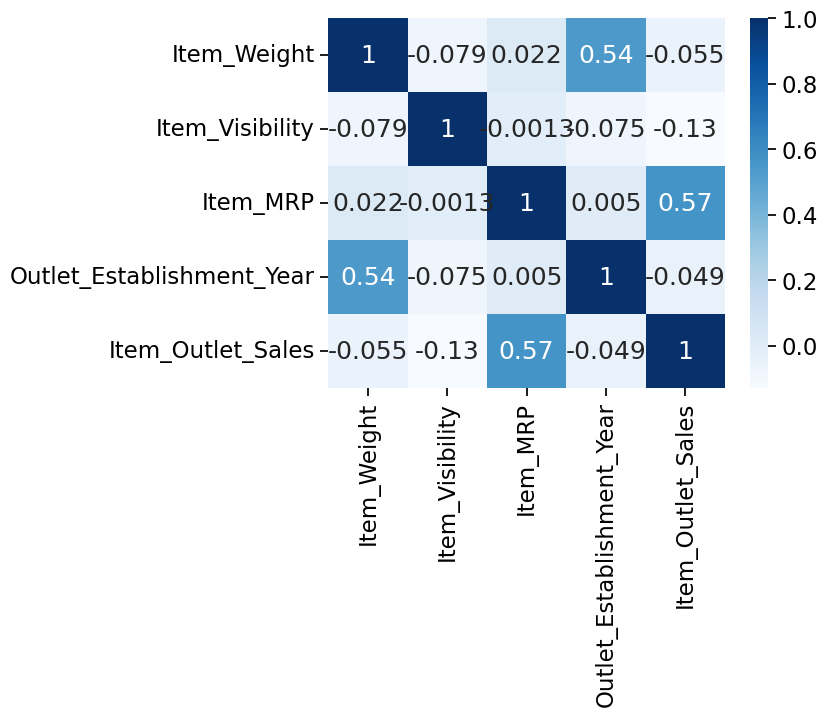

In [169]:
corr = df.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr, cmap = 'Blues', annot = True);

- we can detect that there was no high correlation between any variable, but it is moderate when we for example put Maximum Retail Price against the item outlet sales, we find a moderate correlation which indictaes when there is a higher item sale (higher value item) the probability of having a higher MRP is increased

> ## Feature Inspection